In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Instructions/Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables

Base.prepare(conn, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

#first_row = session.query(Measurement).first()
#first_row.__dict__

session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

last_12_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_12_months

datetime.date(2016, 8, 23)

In [11]:
# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_12_months).\
    all()
precip

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(precip, columns=["date","precipitation"])
df.set_index('date', inplace=True)

# print(df.dtypes)

In [13]:
# Sort the dataframe by date
# already sorted in sqlalchemy
df=df.sort_values("date")

Text(0, 0.5, 'Inches')

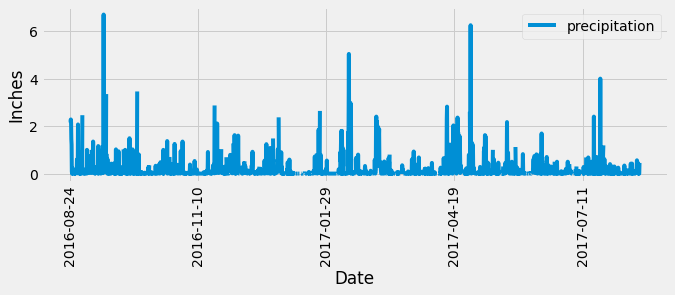

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot(rot=90, figsize=(10,3))
plt.xlabel("Date")
plt.ylabel("Inches")
# plt.tight_layout()
#plt.show()


In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
locations = session.query(Measurement).group_by(Measurement.station).count()
locations

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_by_activity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_by_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), 
                            func.avg(Measurement.tobs)).\
                           filter(Measurement.station == 'USC00519281').\
                           group_by(Measurement.station).first()
most_active
                            

('USC00519281', 54.0, 85.0, 71.66378066378067)

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_obs = session.query(Measurement.tobs).\
            filter(Measurement.station =='USC00519281').\
            filter(Measurement.date > '2016-08-23').\
            order_by(Measurement.date).all()
temp_obs

[(77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),
 (74.0,),


In [20]:
# dataframe
temp_obs_df = pd.DataFrame(temp_obs, columns=["tobs"])
temp_obs_df.head()

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


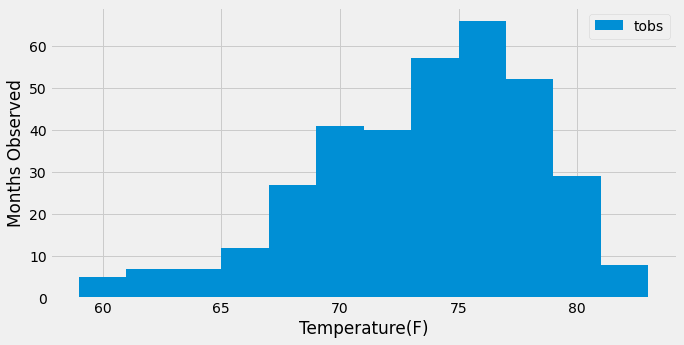

In [21]:
#plot the results as a histogram
plt.figure(figsize=(10,5))
plt.hist(temp_obs_df['tobs'], bins=12)
plt.xlabel("Temperature(F)")
plt.ylabel("Months Observed")
plt.legend(['tobs'])
plt.show()

# Close session

In [22]:
# Close Session
session.close()

In [23]:
# Step 2 - Climate App
# Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.
# Use Flask to create your routes.

from flask import Flask, jsonify

app = Flask(__name__)


In [24]:
# Define what to do when a user hits the index route 
# "/" - Home page
# List all routes that are available.

@app.route("/")
def home():
    return(
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<start><br/>"
        f"/api/v1.0/<start><end>"
    )


In [25]:
# /api/v1.0/precipitation
# Convert the query results to a dictionary using date as the key and prcp as the value.
# Return the JSON representation of your dictionary.

@app.route("/api/v1.0/precipitation")
def precipitation():
    recent_date = dt.date(2017, 8, 23)
    year_ago = recent_date - dt.timedelta(days=365)
    
    historical_temps = (session.query(Measurement.date, Measurement.prcp).\
                       filter(Measurement.date <= recent_date).\
                       filter(Measurement.date >= year_ago).\
                       order_by(Measurement.date).all())
    
    precipitation = {date: prcp for date, prcp in historical_temps}
    return jsonify(precipitation)
    


In [26]:
# /api/v1.0/stations
# Return a JSON list of stations from the dataset.

@app.route("/api/v1.0/stations")
def stations():
    stations_list = (session.query(Station.station).all())
    return jsonify(stations_list)



In [27]:
# /api/v1.0/tobs
# Query the dates and temperature observations of the most active station for the last year of data.
# Return a JSON list of temperature observations (TOBS) for the previous year.

@app.route("/api/v1.0/tobs")
def tobs():
   
    recent_date = dt.date(2017, 8, 23)
    year_ago = recent_date - dt.timedelta(days=365)
    
    hist_tobs = (session.query(Measurement.tobs).\
                filter(Measurement.station == "USC00519281").\
                filter(Measurement.date <= recent_date).\
                filter(Measurement.date >= year_ago).\
                order_by(Measurement.tobs).all())
    return jsonify(hist_tobs)


In [28]:
# /api/v1.0/<start>
# Return a JSON list of the minimum temperature, the average temperature, and the max temperature 
# for a given start or start-end range.
    #     start = (session.query(Measurement.date).order_by(Measurement.date).first())
    #     end = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
# When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.

#https://stackoverflow.com/questions/34615039/sqalchemy-query-between-two-dates

@app.route("/api/v1.0/<start>")
def start(start=None):
#     start = Measurement.date <= "2010-01-01"
#     end = Measurement.date >= "2017-08-23"
        
    tobs_stats = (session.query(Measurement.tobs).\
                 filter(Measurement.date.between(start, "2017-08-23")).all())
    
    tobs_df = pd.DataFrame(tobs_stats, columns=["tobs"])
    
    tmin = tobs_df["tobs"].min()
    tavg = tobs_df["tobs"].mean()
    tmax = tobs_df["tobs"].max()
    print(tmin, tavg, tmax)
    print(tobs_df)    
    
    return jsonify(tmin, tavg, tmax)


In [30]:
# /api/v1.0/<start>/<end>
# Return a JSON list of the minimum temperature, the average temperature, and the max temperature 
# for a given start or start-end range.
    #     start = (session.query(Measurement.date).order_by(Measurement.date).first())
    #     end = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())

# When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.

@app.route("/api/v1.0/<start>/<end>")
def startend(start=None, end=None):
     start = Measurement.date <= "2010-01-01"
     end = Measurement.date >= "2017-08-23"

    tobs_stats = (session.query(Measurement.tobs).\
                 filter(Measurement.date.between(start, end)).all())
    
    tobs_all_df = pd.DataFrame(tobs_stats, columns=["tobs"])
    
    tmin = tobs_all_df["tobs"].min()
    tavg = tobs_all_df["tobs"].mean()
    tmax = tobs_all_df["tobs"].max()
    print(tmin, tavg, tmax)
    print(tobs_all_df)    
    
    return jsonify(tmin, tavg, tmax)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 14)

In [ ]:
if __name__ == "__main__":
    app.run(debug=True)